<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-03-04 08:44:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.17’

m4_survey_data.sqli 100%[===================>]  34.98M  17.2MB/s    in 2.0s    

2023-03-04 08:44:28 (17.2 MB/s) - ‘m4_survey_data.sqlite.17’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT Respondent,DatabaseWorkedWith, sum(Respondent) as count FROM DatabaseWorkedWith 
group by Respondent 
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df
df[df['DatabaseWorkedWith']=='MySQL'].count()

Respondent            1281
DatabaseWorkedWith    1281
count                 1281
dtype: int64

## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT count (DevType),DevType 
FROM DevType
group by DevType order by count (DevType) desc limit 1
""" 
pd.read_sql_query(QUERY,conn)

,count (DevType),DevType
0,6928,"Developer, full-stack"


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:ylabel='Frequency'>

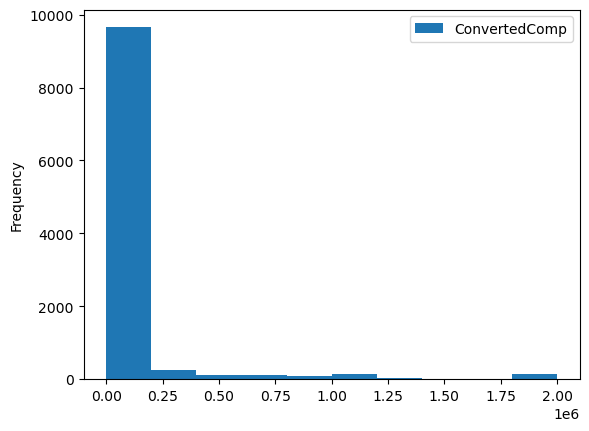

In [8]:
# your code goes here
QUERY= """
SELECT ConvertedComp from master
"""
df=pd.read_sql_query(QUERY,conn)
df.plot(kind='hist')

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

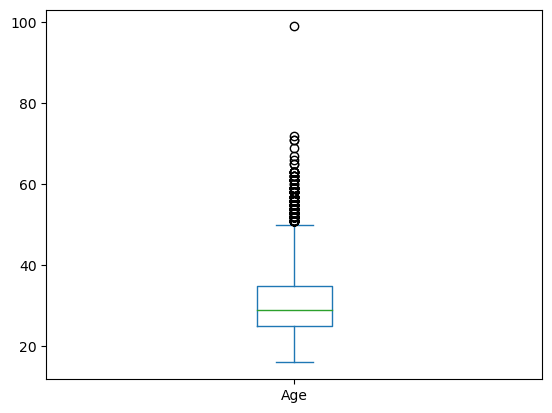

In [9]:
# your code goes here
QUERY="""
select Age from master
"""
df=pd.read_sql_query(QUERY,conn)
df.plot(kind='box')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

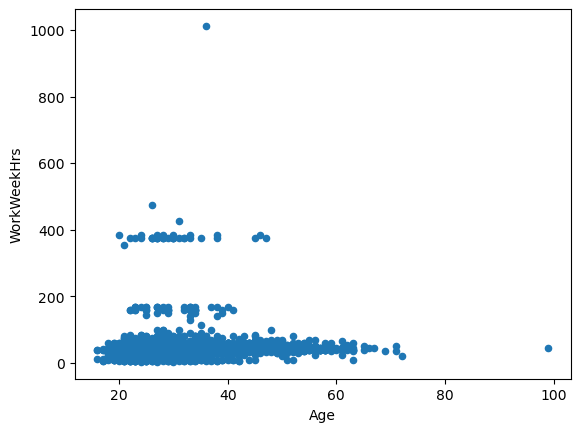

In [10]:
# your code goes here
QUERY="""
select Age,WorkWeekHrs from master
"""
df2=pd.read_sql_query(QUERY,conn)
df2.plot(kind='scatter',x='Age',y='WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Text(0.5, 1.0, 'bubble plot of WorkWeekHrs and CodeRevHrs')

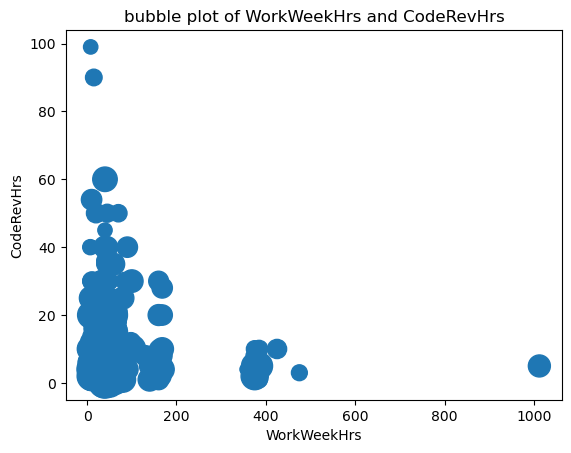

In [11]:
# your code goes here
QUERY="""
select WorkWeekHrs,CodeRevHrs,Age from master
"""
df3=pd.read_sql_query(QUERY,conn)
df3.dropna()
z='Age'
df3.plot.scatter(x='WorkWeekHrs',y='CodeRevHrs',s=(df3['Age']-df3['Age'].min())/(df3['Age'].max()-df3['Age'].min())*1000+10)
plt.title('bubble plot of WorkWeekHrs and CodeRevHrs')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


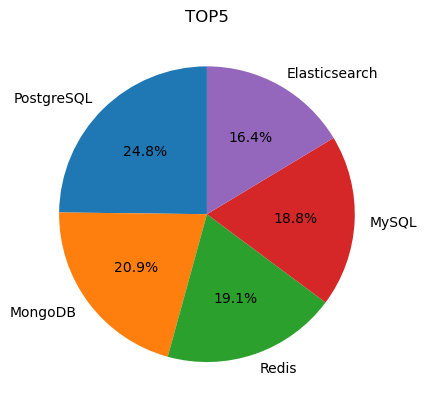

,Count,DatabaseDesireNextYear
0,4328,PostgreSQL
1,3649,MongoDB
2,3331,Redis
3,3281,MySQL
4,2856,Elasticsearch


In [12]:
# your code goes here
QUERY="""
select count(DatabaseDesireNextYear) 
as Count,DatabaseDesireNextYear 
from DatabaseDesireNextYear 
group by DatabaseDesireNextYear 
order by count(DatabaseDesireNextYear) DESC LIMIT 5
"""
df4=pd.read_sql_query(QUERY,conn)
df5=df4.head()
df5.set_index('DatabaseDesireNextYear',inplace=True)
lab=df5.index
sizes=df5.iloc[:,0]
plt.pie(sizes,labels=lab,startangle=90,autopct='%1.1f%%')
plt.title('TOP5')
plt.show()
df4

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


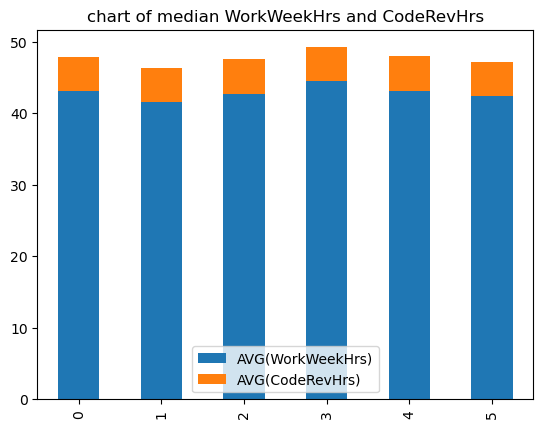

In [13]:
# your code goes here
QUERY ="""
select AVG(WorkWeekHrs),AVG(CodeRevHrs) from master
group by Age 
having Age between 30 and 35
"""
df6=pd.read_sql_query(QUERY,conn)
df6
df6.plot(kind='bar',stacked=True)
plt.title('chart of median WorkWeekHrs and CodeRevHrs')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


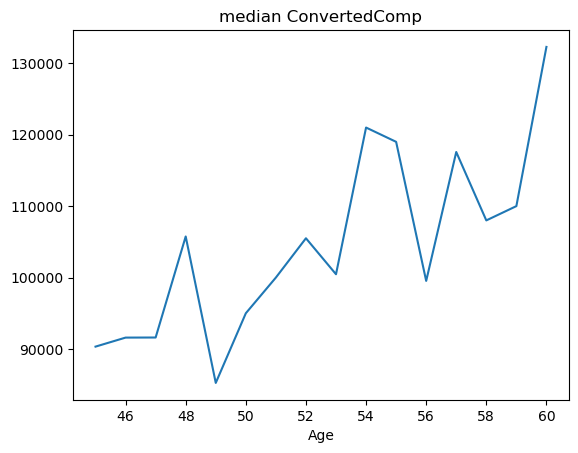

In [14]:
# your code goes here
QUERY= """
select Age,ConvertedComp  from master  where  Age between 45 and 60
"""
df10=pd.read_sql_query(QUERY,conn)
df11=df10.groupby('Age')['ConvertedComp'].median()
df11.plot(kind='line')
plt.title('median ConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


MainBranch
I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: MainBranch, dtype: int64

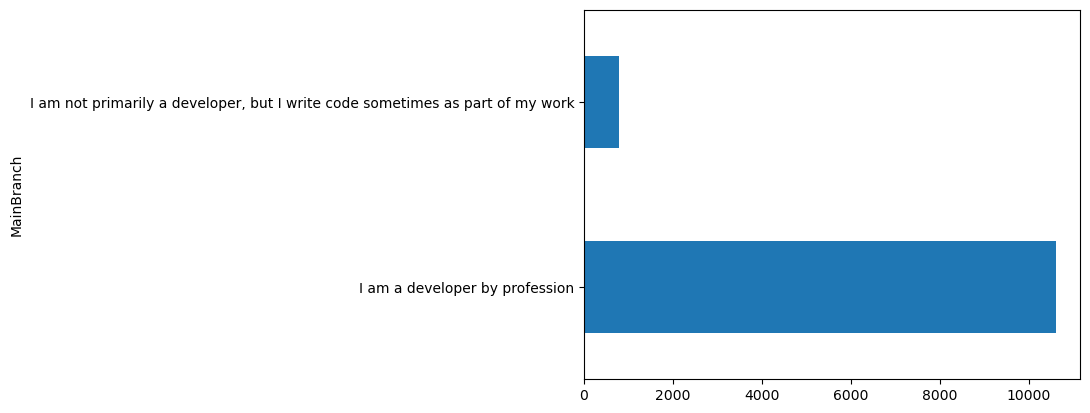

In [15]:
# your code goes here
QUERY="""
select MainBranch from master
"""
df11=pd.read_sql_query(QUERY,conn)
df12=df11.groupby('MainBranch')['MainBranch'].count()
df12.plot(kind='barh')
df12

Close the database connection.


In [16]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
